In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px


In [2]:
df = pd.read_excel('Kvart_Sovet.xlsx')

In [4]:
for i in range(len(df['street'])):
    if df['street'][i] == 'Академика Коптюга пр-кт' or df['street'][i] == 'Академика_Коптюга':
        df['street'][i] = 'Академика_Коптюга_проспект'
    elif df['street'][i] == 'Морской пр-кт':
        df['street'][i] = 'Морской_проспект'
    elif df['street'][i] == 'Молодeжи б-р' or df['street'][i] == 'Молодёжи б-р' or df['street'][i] == 'Молодёжи бульвар' or df['street'][i] == 'Молодежи_б-р':
        df['street'][i] = 'Молодежи_бульвар'
    elif df['street'][i] == 'Ученых':
        df['street'][i] = 'Учёных'
    elif df['street'][i] == 'Академика_Иванова':
        df['street'][i] = 'Иванова'
for i in range(len(df['street'])):
    s = ''
    a = df['street'][i].split(' ')
    if len(a) != 1:
        for j in range(2):
            if j == 0:
                s += a[j] + '_'
            else:
                s += a[j]
        df['street'][i] = s

C:\Users\eliza\AppData\Local\Temp\ipykernel_17528\1621019402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['street'][i] = 'Академика_Коптюга_проспект'
C:\Users\eliza\AppData\Local\Temp\ipykernel_17528\1621019402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['street'][i] = 'Академика_Коптюга_проспект'
C:\Users\eliza\AppData\Local\Temp\ipykernel_17528\1621019402.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['st

In [6]:
df.loc[df.sp_kitchen == '-', 'sp_kitchen'] = np.nan
kvart_new = df[df.sp_kitchen.notna()]

In [7]:
kvart_new = kvart_new[(kvart_new.sp_total < 120) & (kvart_new.price <= 15000)]

In [8]:
fig = px.box(kvart_new, y='sp_total')
fig.update_layout(title='Total square of the flat in square meters',
                  legend_orientation='h')
fig.show()

Text(0, 0.5, 'Quantity')

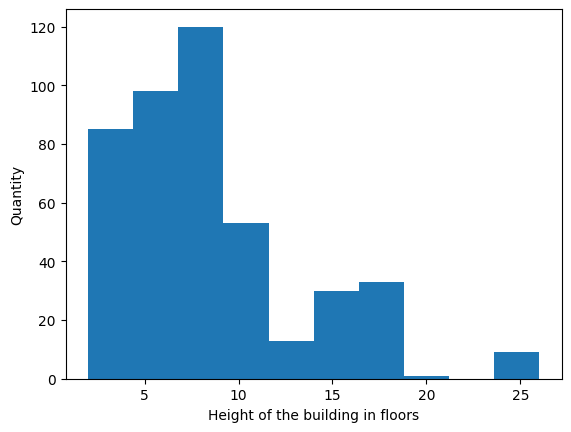

In [219]:
plt.hist(kvart_new['height'])
plt.xlabel('Height of the building in floors')
plt.ylabel('Quantity')

Text(0.5, 0, 'Floor of the flat')

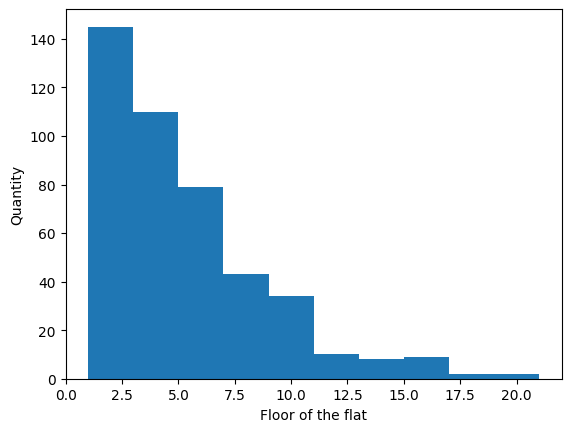

In [220]:
plt.hist(kvart_new['floor'])
plt.ylabel('Quantity')
plt.xlabel('Floor of the flat')

Text(0.5, 0, 'Price of the flat')

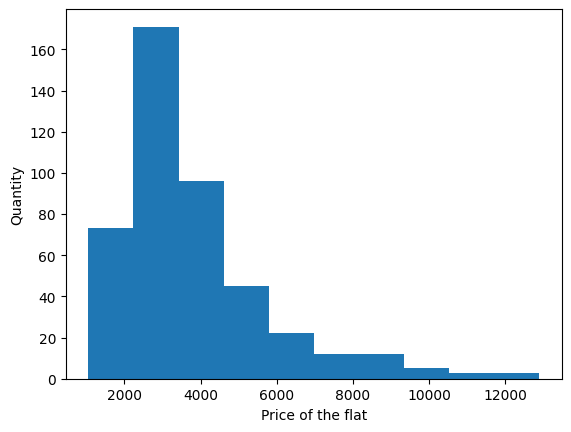

In [222]:
plt.hist(kvart_new['price'])
plt.ylabel('Quantity')
plt.xlabel('Price of the flat')

Text(0.5, 0, 'Total square of the flat in square meters')

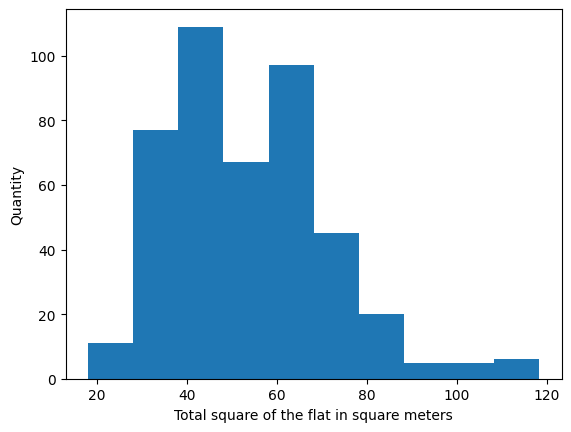

In [223]:
plt.hist(kvart_new['sp_total'])
plt.ylabel('Quantity')
plt.xlabel('Total square of the flat in square meters')

In [8]:
kvart_new = kvart_new.dropna(how='all')


In [9]:
kvart_new = kvart_new.drop(columns=['ID', 'city', 'district'])

In [11]:
def find_number(series):
    c = 0
    for i in series:
        number = ''
        for k in str(i):
            if k.isdigit() and k != '/':
                number += k
            else:
                break
        series[c] = int(number)
        c += 1
    return series


kvart_new['h_number'] = find_number(kvart_new['h_number'])

C:\Users\eliza\AppData\Local\Temp\ipykernel_26748\3255133131.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[c] = int(number)
C:\Users\eliza\AppData\Local\Temp\ipykernel_26748\3255133131.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[c] = int(number)
C:\Users\eliza\AppData\Local\Temp\ipykernel_26748\3255133131.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[c] = int(number)
C:\Users\eliza\AppData\Lo

In [12]:
side_list = []

for i in kvart_new['h_number']:
    try:
        if int(i) % 2 == 0:
            side_list.append(1)
        else:
            side_list.append(0)
            
    except ValueError:
        number = ''

        for k in str(i):
            if k.isdigit() and k != '/':
                number += k
            else:
                break

        if int(number) % 2 == 0:
            side_list.append(1)
        else:
            side_list.append(0)

kvart_new['side'] = side_list
kvart_new2 = kvart_new.drop(['h_number'], axis=1)

In [13]:
df_dummy_wd = pd.get_dummies(kvart_new2, columns=['street', 'rooms'], dtype = 'float64', drop_first = True)

In [14]:
train, test = train_test_split(df_dummy_wd, test_size=0.27)
test_regressors = test.drop(columns=['price'])
test_price = test.price
train_regressors = train.drop(columns=['price'])
regressors = train_regressors.columns.to_list()

In [32]:
test.shape, train.shape

((120, 68), (322, 68))

In [15]:
maxpvalue = 1
n = 1

while maxpvalue > 0.05:
    x = train[regressors]
    y = train['price']
    x1 = sm.add_constant(x)
    model = sm.OLS(y, x1.astype(float)).fit()
    pv = model.pvalues.to_list()
    maxpv = max(pv[1:])
    max_index = pv.index(maxpv)
    print('Номер интерации: '+ str(n))
    print('Регрессор с максимальным p-value: '+ str(regressors[max_index-1]) + ' P-value: '+ str(maxpv))
    print('-------------------------------------------------------------')

    if maxpv > 0.05:
        regressors.pop(max_index - 1)
        maxpvalue = maxpv
        n += 1
    else:
        maxpvalue = 0

print('Итоговая модель: ')
y = train['price']
x = train[regressors]
x1 = sm.add_constant(x)
model = sm.OLS(y, x1.astype(float)).fit()
print(model.summary2())

Номер интерации: 1
Регрессор с максимальным p-value: street_Русская P-value: 0.9635544941820553
-------------------------------------------------------------
Номер интерации: 2
Регрессор с максимальным p-value: street_Добровольческая P-value: 0.9499432616491726
-------------------------------------------------------------
Номер интерации: 3
Регрессор с максимальным p-value: street_Рыбацкая P-value: 0.9490889663398233
-------------------------------------------------------------
Номер интерации: 4
Регрессор с максимальным p-value: floor P-value: 0.899596576200161
-------------------------------------------------------------
Номер интерации: 5
Регрессор с максимальным p-value: street_Энгельса P-value: 0.8819350759728335
-------------------------------------------------------------
Номер интерации: 6
Регрессор с максимальным p-value: street_Гидромонтажная P-value: 0.8709766075020272
-------------------------------------------------------------
Номер интерации: 7
Регрессор с максимальным p

In [16]:
test_1 = test_regressors[model.params.index.to_list()[1:]]
test_1 = sm.add_constant(test_1)
pred = model.predict(test_1)
print(pred)

214    3301.489521
284    3646.558099
198    2070.077151
206    3491.279693
366    2148.559512
          ...     
65     2041.970743
367    2148.559512
466    3426.156046
256    3910.913294
86     4723.970668
Length: 120, dtype: float64


In [17]:
model.params

const                     -1657.951777
sp_total                     90.849815
height                       77.926170
street_Академическая       1865.209077
street_Балтийская          -531.058199
street_Барьерная           -683.916572
street_Весенний_проезд     1970.146639
street_Героев_Труда         688.951732
street_Демакова             617.515942
street_Детский_проезд      1852.041880
street_Жемчужная           2075.672824
street_Зеленая_Горка      -1293.490199
street_Золотодолинская     3550.080689
street_Иванова              568.948030
street_Ивлева             -1824.365548
street_Ильича              2296.962806
street_Лесосечная          -594.375539
street_Молодежи_бульвар     977.277910
street_Молодости          -1213.426723
street_Морской_проспект    3604.834723
street_Пирогова            3276.819811
street_Полевая              680.806720
street_Правды              4676.585679
street_Приморская          -891.171148
street_Разъездная          1718.177303
street_Российская        

In [18]:
predictions_compare = pd.DataFrame({'real': test_price.to_list(),
                                    'predicted': pred})
print(predictions_compare)

     real    predicted
214  3412  3301.489521
284  3260  3646.558099
198  2345  2070.077151
206  3400  3491.279693
366  2100  2148.559512
..    ...          ...
65   1900  2041.970743
367  2200  2148.559512
466  3950  3426.156046
256  3300  3910.913294
86   4450  4723.970668

[120 rows x 2 columns]


In [19]:
print('MAE:', mean_absolute_error(test_price, pred))
print('MAPE:', mean_absolute_percentage_error(test_price, pred))

MAE: 588.1361220714646
MAPE: 0.1508444678435591


In [38]:
#Chow

df_dummy_wd = sm.add_constant(df_dummy_wd)

y = df_dummy_wd.price
X = df_dummy_wd.drop('price', axis=1)

X_one = X[(X.rooms_2 == 0) & (X.rooms_3 == 0) & (X.rooms_4 == 0)].drop(['rooms_2', 'rooms_3', 'rooms_4'], axis=1)
y_one = df_dummy_wd.price[(X.rooms_2 == 0) & (X.rooms_3 == 0) & (X.rooms_4 == 0)]

X_many = X[(X.rooms_2 != 0) | (X.rooms_3 != 0) | (X.rooms_4 != 0)].drop(['rooms_2', 'rooms_3', 'rooms_4'], axis=1)
y_many = df_dummy_wd.price[(X.rooms_2 != 0) | (X.rooms_3 != 0) | (X.rooms_4 != 0)]

J = X.shape[1]
k = X_one.shape[1]
N1 = X_one.shape[0]
N2 = X_many.shape[0]

model_dummy = sm.OLS(y,X.astype(float)).fit()
RSSd = model_dummy.ssr

model_many = sm.OLS(y_many,X_many.astype(float)).fit()
RSS_many = model_many.ssr

model_one = sm.OLS(y_one,X_one.astype(float)).fit()
RSS_one = model_one.ssr

chow = ((RSSd - (RSS_many+RSS_one))/J)/((RSS_one+RSS_many)/(N1+N2 -2*k))
import scipy
pvalue = (1 - scipy.stats.f.cdf(chow,J, N1+N2 - 2*k))
print(pvalue)
print(chow)
if pvalue < 0.05:
    print('We reject the first hypothesis, coefficients are not the same.')
else:
    print('We accept the first hypothesis.')

0.9999999997059613
0.25269314709464724
We accept the first hypothesis.


In [41]:
#Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
scaler = StandardScaler()
cluster_df = df_dummy_wd[['price', 'sp_total', 'height']]
cluster_df_scaled = scaler.fit_transform(cluster_df)
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(cluster_df_scaled)
    wcss.append(kmeans.inertia_)

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(x for x in range(1, 11)), y=wcss, name='WCSS'))
fig.show()

kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
predicted = kmeans.fit_predict(cluster_df_scaled)


Text(0.5, 0.5, 'Цена квартиры')

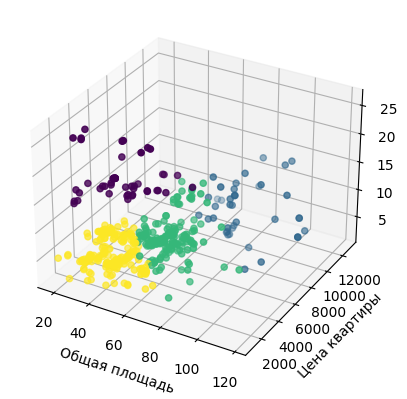

In [43]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
predicted = kmeans.fit_predict(cluster_df_scaled)
yaxis = kvart_new2.price.to_list()
xaxis = kvart_new.sp_total.to_list()
zaxis = kvart_new.height.to_list()

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(xaxis, yaxis, zaxis, c=predicted)

plt.xlabel('Общая площадь')
plt.ylabel('Цена квартиры')


In [44]:
df_dummy_wd['class'] = predicted

In [45]:
df_dummy_wd.groupby('class').describe()[['price', 'sp_total']]

price                                                             \
       count         mean          std     min      25%     50%     75%   
class                                                                     
0       50.0  3270.720000  1032.265174  1480.0  2812.50  3353.0  3572.5   
1       40.0  8588.700000  1732.342377  5900.0  7396.75  8550.0  9550.0   
2      156.0  4289.185897  1065.290642  1600.0  3400.00  4199.5  5000.0   
3      196.0  2629.137755   745.402405  1050.0  2150.00  2525.0  3000.0   

               sp_total                                                    \
           max    count      mean       std       min       25%       50%   
class                                                                       
0       6250.0     50.0 -0.137119  0.159646 -0.384038 -0.228854 -0.181446   
1      12900.0     40.0  0.444679  0.218498  0.010232  0.289222  0.385402   
2       7190.0    156.0  0.155161  0.118192 -0.052524  0.074011  0.133015   
3       5000.0    196.0 -0.165326  0.120710 -0.480900 -0.268076 -0.154843   

                           
            75%       max  
class                      
0     -0.056958  0.300819  
1      0.611869  0.887449  
2      0.233799  0.652797  
3     -0.112551  0.160300

In [37]:
# Random forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:

train, test = train_test_split(df_dummy_wd, test_size=0.2)
df_train, price_train = train.drop('price', axis=1), train['price']
df_test, price_test = test.drop('price', axis=1), test['price']

param_grid = {
    'n_estimators': np.linspace(100, 1200, num=12).astype(int),
    'max_depth': [None] + list(np.linspace(5, 50).astype(int)),
    'max_features': ['auto', 'sqrt', None],
    'max_leaf_nodes': list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10],
    'bootstrap': [True, False]
}
estimator = RandomForestRegressor(random_state=50, oob_score=True)
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, scoring='neg_mean_squared_error', n_iter=200,
                        cv = 4,
                        verbose = 2)
rs.fit(df_train, price_train)

In [58]:
rs.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 47,
 'max_features': None,
 'max_depth': 44,
 'bootstrap': True}

In [59]:
best_model = rs.best_estimator_
train_predict = best_model.predict(df_train)

test_predictions = best_model.predict(df_test)

In [64]:
print('train MAPE:', mean_absolute_percentage_error(train_predict, price_train))
print('test MAPE:', mean_absolute_percentage_error(price_test, test_predictions))
print('test MAE:', mean_absolute_error(price_test, test_predictions))
compare = pd.DataFrame({'real price': price_test, 'predicted price': test_predictions})


train MAPE: 0.09716758913346059
test MAPE: 0.11749502550125421
test MAE: 452.21368712431104


In [32]:
# Catboost

from catboost import CatBoostRegressor, Pool


cat_features = ['street']
numeric_features = kvart_new.drop(columns=cat_features).columns.tolist()

numeric_features.remove('side')
numeric_features.remove('h_number')
numeric_features.remove('price')

X = kvart_new[np.concatenate((cat_features, numeric_features), axis=0)]
y = kvart_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [52]:
# hyperparameter tuning

model = CatBoostRegressor(cat_features=cat_features)

parameters = {'iterations': np.linspace(100, 400, num=3).astype(int),
              'learning_rate': np.linspace(0.01, 0.05, num=5),
              'depth': np.linspace(4, 10, num=6).astype(int)
              }

rs = RandomizedSearchCV(model, parameters, n_jobs = -1, scoring='neg_mean_squared_error', n_iter=200,
                        cv = 3,
                        verbose = 2)
rs.fit(X_train, y_train)

c:\Users\eliza\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 90 is smaller than n_iter=200. Running 90 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 90 candidates, totalling 270 fits
0:	learn: 1874.9785123	total: 15.3ms	remaining: 6.12s
1:	learn: 1839.4503989	total: 33.8ms	remaining: 6.73s
2:	learn: 1805.9625404	total: 51.1ms	remaining: 6.76s
3:	learn: 1778.4500395	total: 70.8ms	remaining: 7.01s
4:	learn: 1747.8436680	total: 91.1ms	remaining: 7.19s
5:	learn: 1722.9157946	total: 103ms	remaining: 6.77s
6:	learn: 1687.6470437	total: 121ms	remaining: 6.8s
7:	learn: 1663.3856479	total: 138ms	remaining: 6.79s
8:	learn: 1635.8650971	total: 155ms	remaining: 6.71s
9:	learn: 1614.6443780	total: 170ms	remaining: 6.64s
10:	learn: 1589.3740065	total: 186ms	remaining: 6.58s
11:	learn: 1567.6915120	total: 202ms	remaining: 6.52s
12:	learn: 1544.7103349	total: 218ms	remaining: 6.49s
13:	learn: 1518.1368795	total: 235ms	remaining: 6.49s
14:	learn: 1501.6275559	total: 252ms	remaining: 6.48s
15:	learn: 1486.3544363	total: 270ms	remaining: 6.47s
16:	learn: 1469.3230733	total: 287ms	remaining: 6.46s
17:	learn: 1448.6539956	to

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001F80A46E110>,
                   n_iter=200, n_jobs=-1,
                   param_distributions={'depth': array([ 4,  5,  6,  7,  8, 10]),
                                        'iterations': array([100, 250, 400]),
                                        'learning_rate': array([0.01, 0.02, 0.03, 0.04, 0.05])},
                   scoring='neg_mean_squared_error', verbose=2)

In [53]:
rs.best_estimator_

In [54]:
catboost_model = rs.best_estimator_
catboost_pred = catboost_model.predict(X_test)

In [55]:
compare = pd.DataFrame({'catboost': catboost_pred, 'real': y_test})

In [56]:
mean_absolute_percentage_error(y_test, catboost_pred)
mean_absolute_error(y_test, catboost_pred)

549.6959346673939

In [58]:
catboost_model.feature_importances_

array([24.94011695,  2.53979544, 35.90551905, 10.96577792, 11.86737341,
        1.86225302, 11.9191642 ])